## 1.7 Network graph visualization

In [67]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [68]:
import numpy as np
import pandas as pd
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)


NumPy version: 1.20.3
Pandas version: 1.5.1


In [69]:
# Import relationship data

relationship_df = pd.read_csv('country_relationship.csv')

In [70]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,21
2,Germany,Italy,26
3,Austria,Germany,11
4,Germany,Spain,2
...,...,...,...
83,Greece,Italy,3
84,Italy,Japan,6
85,Romania,Russia,6
86,India,Lebanon,2


In [71]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

##  Graph visualization - Networkx

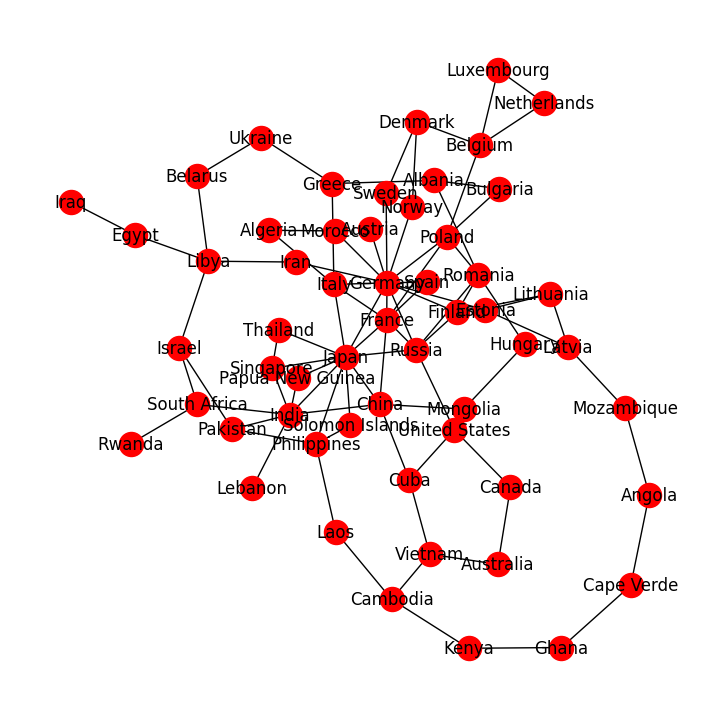

In [73]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [74]:
h.savefig('networkx_plt_20thcentury.png')

#### Graph visualization - Pyvis

In [76]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20thcentury.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Community detection - Leiden algorithm

In [78]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [79]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [80]:
new_com = coms.to_node_community_map()

In [81]:
new_com

defaultdict(list,
            {'Japan': [0],
             'Thailand': [0],
             'Singapore': [0],
             'Solomon Islands': [0],
             'Philippines': [0],
             'India': [0],
             'Pakistan': [0],
             'Israel': [0],
             'South Africa': [0],
             'Papua New Guinea': [0],
             'Rwanda': [0],
             'Lebanon': [0],
             'France': [1],
             'Russia': [1],
             'Germany': [1],
             'Italy': [1],
             'Austria': [1],
             'Spain': [1],
             'Poland': [1],
             'Finland': [1],
             'Morocco': [1],
             'Algeria': [1],
             'Romania': [1],
             'Estonia': [2],
             'Latvia': [2],
             'Lithuania': [2],
             'Laos': [2],
             'Cambodia': [2],
             'Kenya': [2],
             'Ghana': [2],
             'Cape Verde': [2],
             'Angola': [2],
             'Mozambique': [2],
        

In [82]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [83]:
dict_com

{'Japan': 0,
 'Thailand': 0,
 'Singapore': 0,
 'Solomon Islands': 0,
 'Philippines': 0,
 'India': 0,
 'Pakistan': 0,
 'Israel': 0,
 'South Africa': 0,
 'Papua New Guinea': 0,
 'Rwanda': 0,
 'Lebanon': 0,
 'France': 1,
 'Russia': 1,
 'Germany': 1,
 'Italy': 1,
 'Austria': 1,
 'Spain': 1,
 'Poland': 1,
 'Finland': 1,
 'Morocco': 1,
 'Algeria': 1,
 'Romania': 1,
 'Estonia': 2,
 'Latvia': 2,
 'Lithuania': 2,
 'Laos': 2,
 'Cambodia': 2,
 'Kenya': 2,
 'Ghana': 2,
 'Cape Verde': 2,
 'Angola': 2,
 'Mozambique': 2,
 'Albania': 3,
 'Greece': 3,
 'Ukraine': 3,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Iran': 3,
 'Bulgaria': 3,
 'China': 4,
 'Hungary': 4,
 'Mongolia': 4,
 'Cuba': 4,
 'United States': 4,
 'Canada': 4,
 'Australia': 4,
 'Vietnam': 4,
 'Belgium': 5,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5}

In [84]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20thcentury_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### The most important countries in 20th century

In [86]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.12727272727272726,
 'Russia': 0.10909090909090909,
 'Germany': 0.23636363636363636,
 'Italy': 0.09090909090909091,
 'Austria': 0.01818181818181818,
 'Spain': 0.03636363636363636,
 'Poland': 0.09090909090909091,
 'Estonia': 0.05454545454545454,
 'Latvia': 0.05454545454545454,
 'Lithuania': 0.05454545454545454,
 'Finland': 0.07272727272727272,
 'Belgium': 0.07272727272727272,
 'Netherlands': 0.03636363636363636,
 'Luxembourg': 0.03636363636363636,
 'Denmark': 0.05454545454545454,
 'Norway': 0.03636363636363636,
 'Sweden': 0.03636363636363636,
 'Albania': 0.05454545454545454,
 'Greece': 0.05454545454545454,
 'Ukraine': 0.03636363636363636,
 'Belarus': 0.03636363636363636,
 'Libya': 0.07272727272727272,
 'Egypt': 0.03636363636363636,
 'Iraq': 0.01818181818181818,
 'Japan': 0.19999999999999998,
 'Morocco': 0.03636363636363636,
 'Algeria': 0.03636363636363636,
 'China': 0.09090909090909091,
 'Thailand': 0.03636363636363636,
 'Singapore': 0.05454545454545454,
 'Solomon Islands': 

In [87]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [88]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

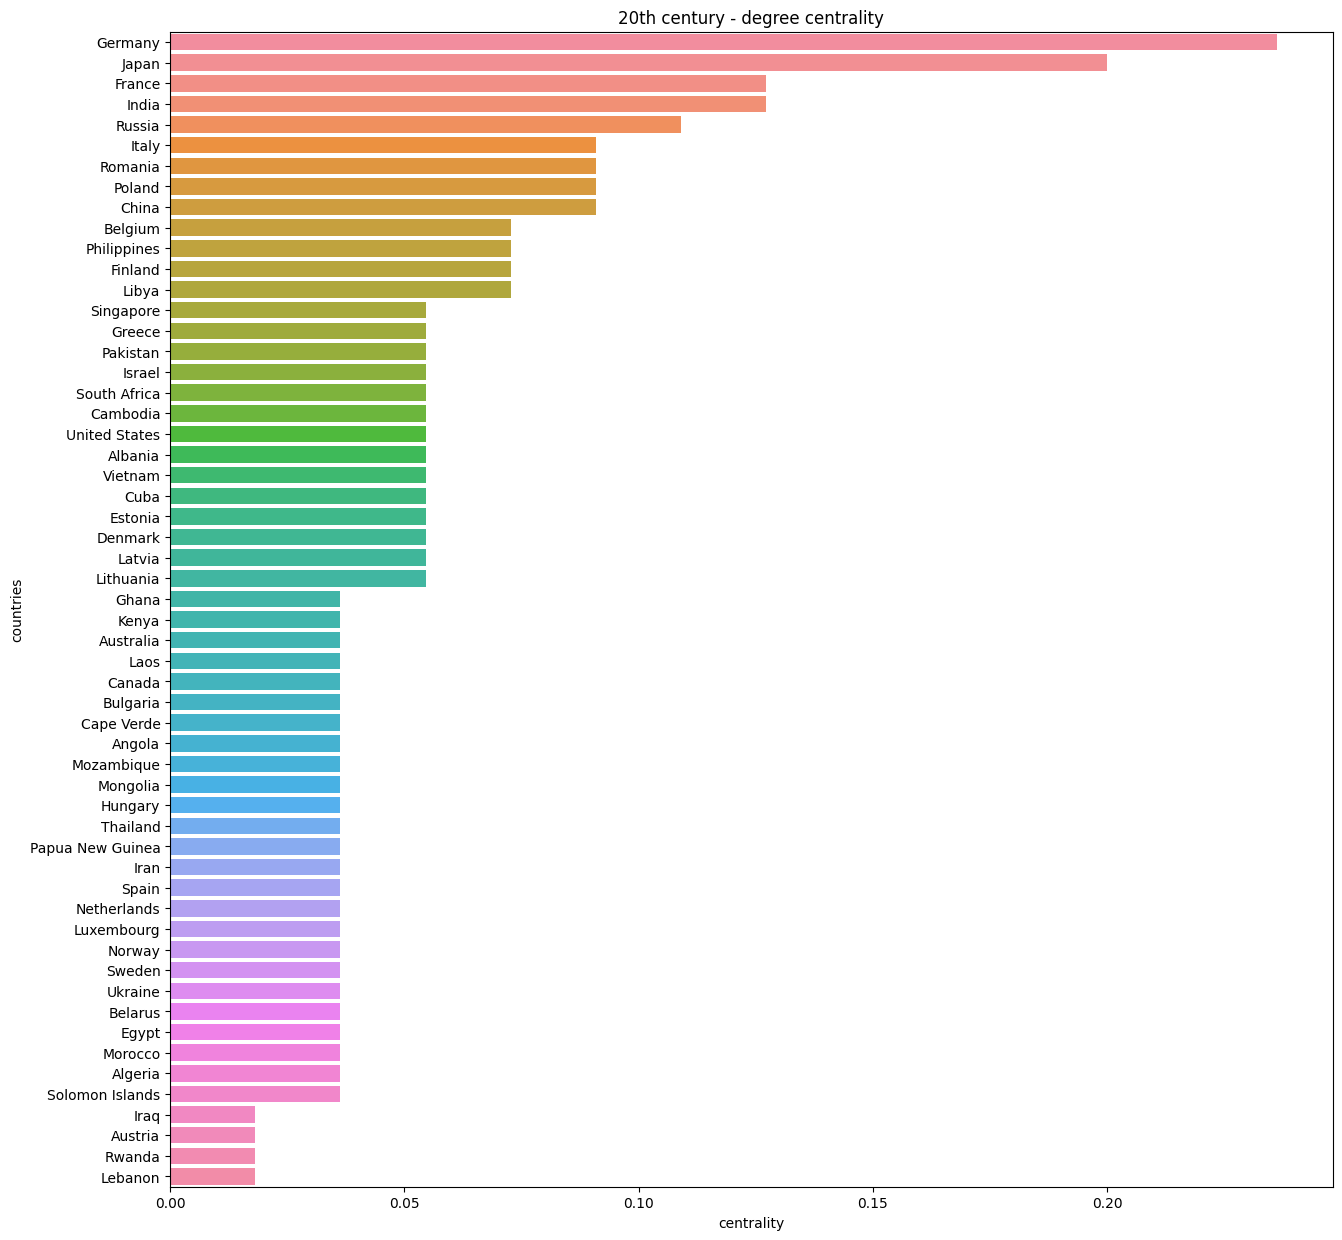

In [89]:
# Plot the degree centrality

plt.figure(figsize = (15, 15))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th century - degree centrality")

### The bar chart shows that Germany has the highest degree of centrality. It means that Germany has the most connections to other countries within the 20th century. This isn’t surprising since Germany became the main reason that caused two world wars. Therefore, it lead the world into a chaos and drag the other countries in this war. Next is Japan, which is also very important actor that participate the second world war in the pasific. Rwanda and Lebanon have the fewest connections, as shown in the interactive graph earlier.



In [91]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [92]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

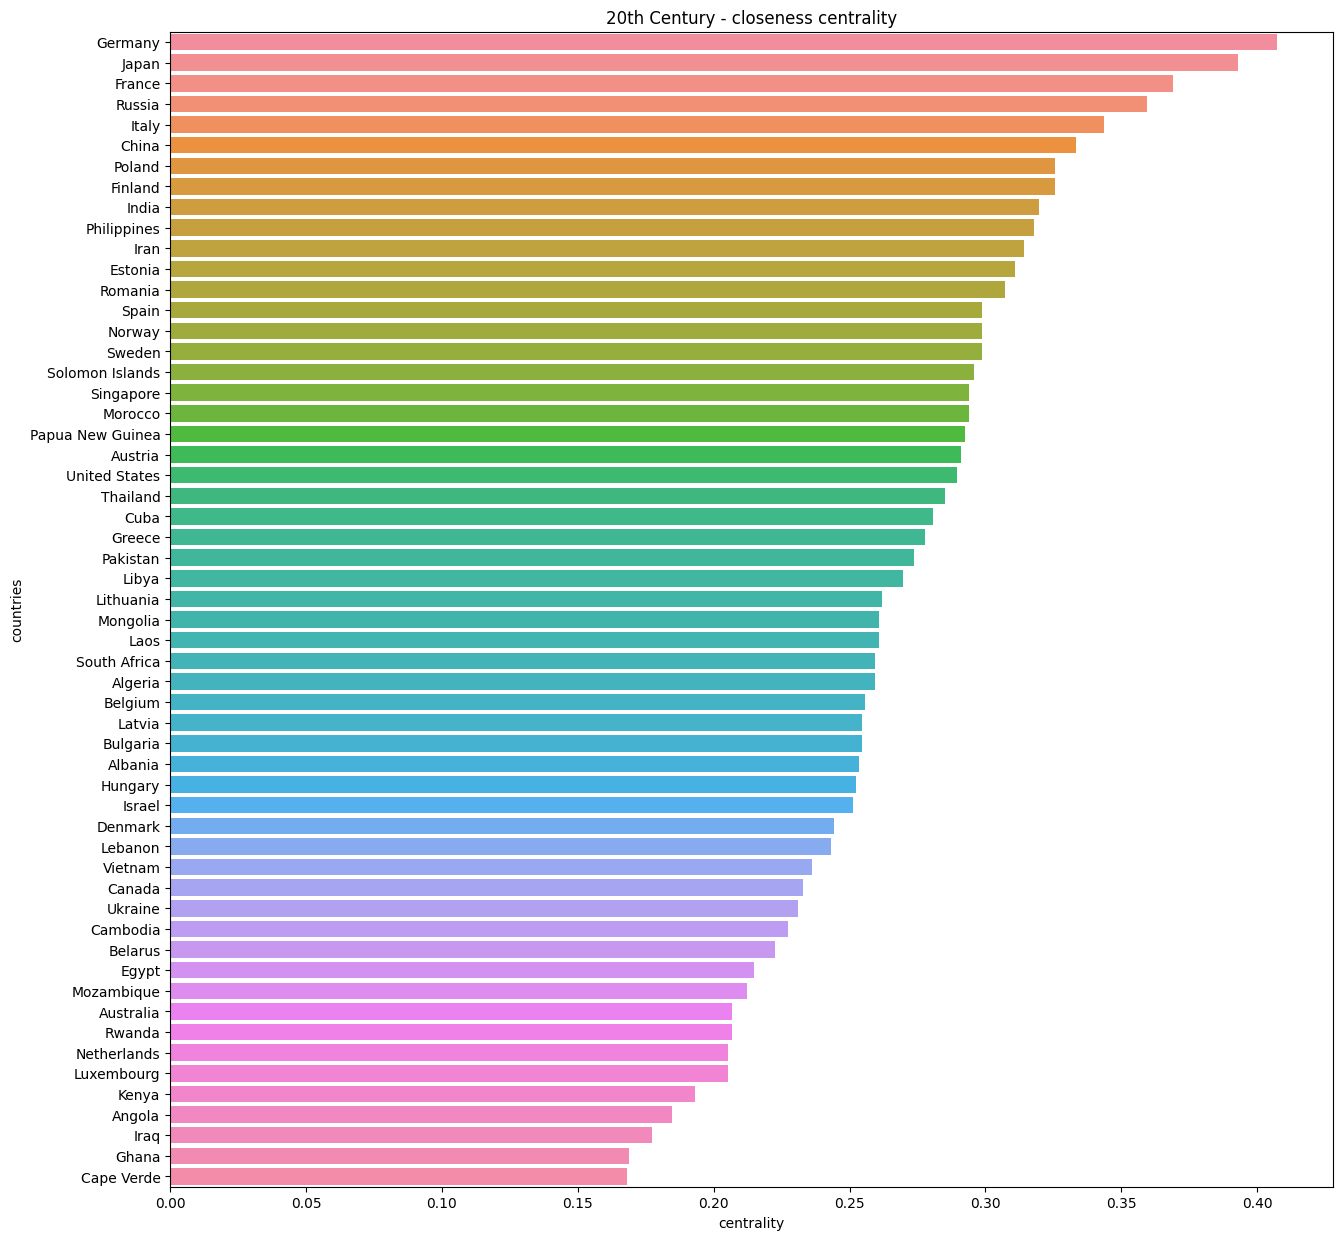

In [93]:
plt.figure(figsize = (15, 15))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century - closeness centrality")

### The results look similar to the degree of centrality output regarding the order of importance, which is unsurprising. However, all the countries rank highly on the closeness scale. That’s because almost all of them are connected to the main countries leading the world into the world wars, Germany (except for Ghana and Cape Verde, placed at the bottom of the chart).

In [95]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [96]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

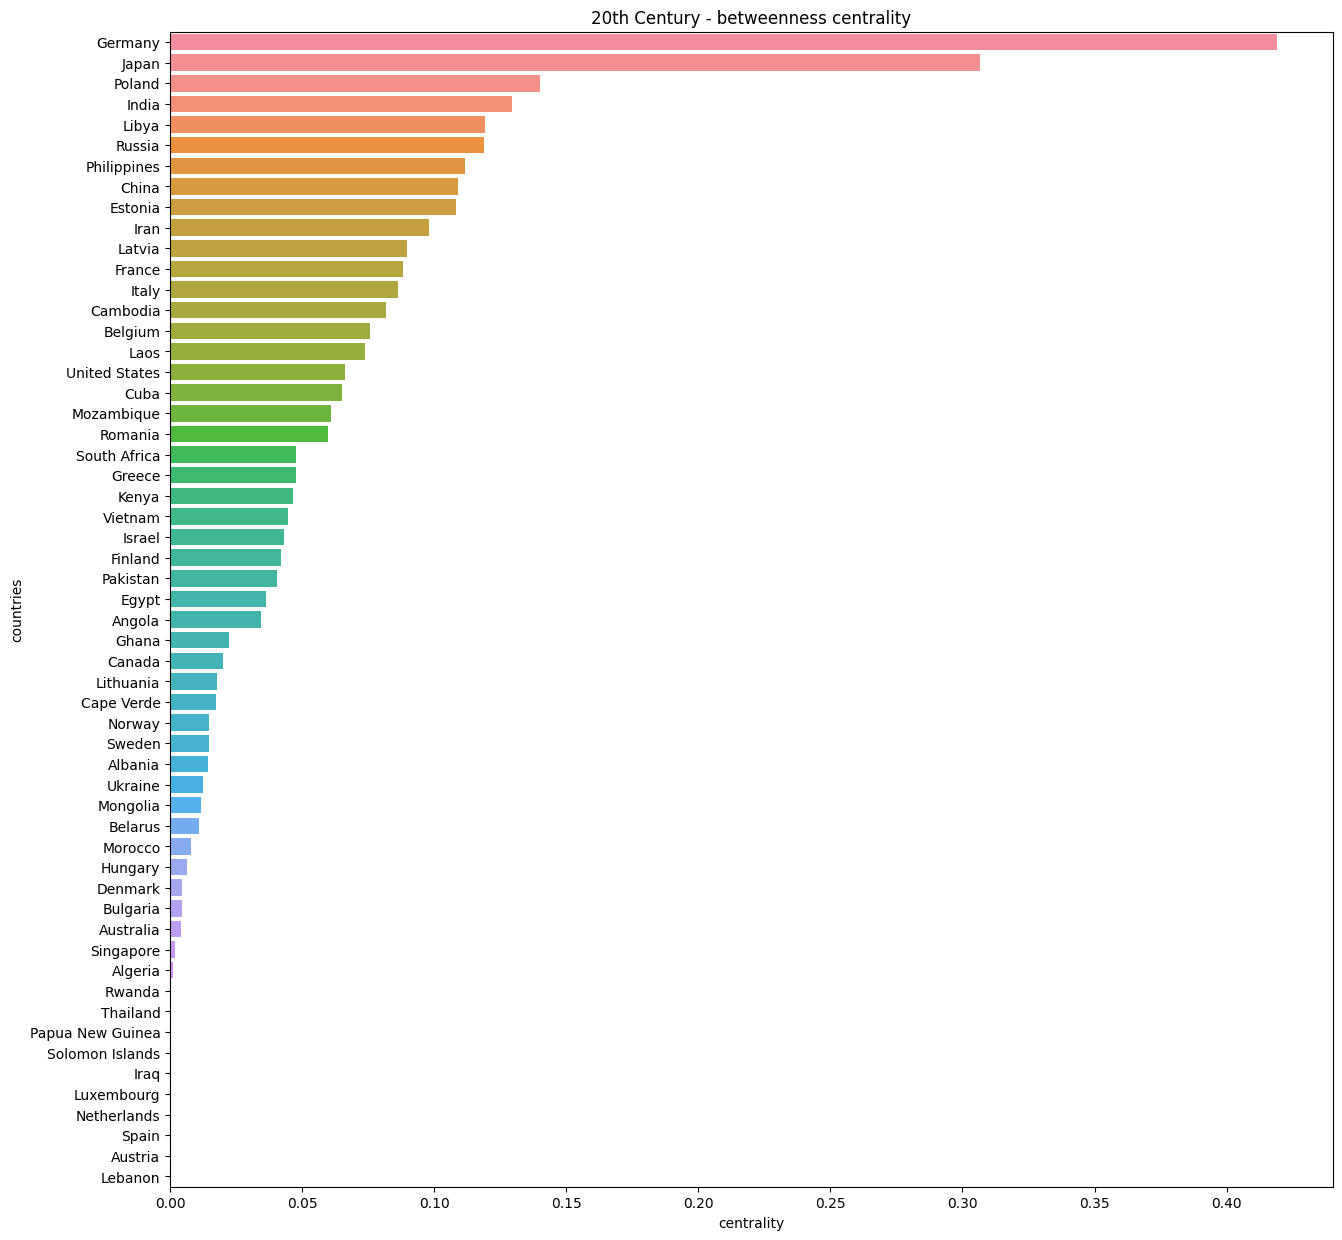

In [97]:
plt.figure(figsize = (15, 15))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century - betweenness centrality")

### The betweenness measure output reconfirms what the closeness centrality score established—specifically, that the most ”influential” country is Germany, followed by Japan. All the other countries score relatively low on this scale, which is unsurprising as most of them act as side countries according to their alliance along these world wars.

In [99]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')